 
Необходимо найти точки роста на следующий год и  исследовать две темы: 

1. **Тренировки**: как они распределяются во времени и по тренерам, как обстоят дела в разных клубах.
2. **Клиентов**: как их можно сегментировать, какие у них привычки.



In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

import datetime as dt

In [2]:
# загружаем данные

workouts = pd.read_csv('workouts.csv', parse_dates=['start_at'])
users = pd.read_excel('users.xlsx')

In [3]:
workouts.head()

,workout_id,cost,start_at,status,workout_schedule_type,client_id,client_status,workout_type,trainer_department,trainer_id
0,30793909,NaN,2020-11-13 12:45:00,success,trial,22034,NaN,general,Sales,10722051
1,31123309,750.0,2020-11-21 13:00:00,success,regular,22034,new,general,Spartacus,940642
2,31412167,750.0,2020-11-28 13:00:00,success,regular,22034,new,general,Spartacus,940642
3,31703605,750.0,2020-12-05 13:00:00,success,regular,22034,active,general,Spartacus,940642
4,26904500,NaN,2020-08-06 18:20:00,success,trial,88101,NaN,general,Sales,3826530


In [4]:
users.head()

,first_contact_datetime,age,free_workout_datetime,first_payment_datetime,workouts_successful,workouts_total,months_active,user_id,region,geo_group
0,2020-08-08 13:57:25,NaN,2020-08-08 19:00:00,2020-08-08 21:18:34,10,13,2,2790000,NaN,СНГ
1,2020-05-02 00:30:02,NaN,2020-05-05 18:20:00,2020-05-05 18:40:29,26,38,7,780106,NaN,СНГ
2,2019-06-27 13:10:33,30.0,NaN,2020-03-18 16:06:43,27,33,6,1133376,NaN,СНГ
3,2020-04-22 15:37:58,22.0,2020-04-27 09:00:00,2020-04-27 09:41:37,59,59,8,1996499,NaN,СНГ
4,2016-06-23 16:21:40,24.0,2020-04-13 19:00:00,2020-04-13 19:16:51,8,12,2,57899,Москва и Московская область,Москва


In [5]:
# сразу создаем новый датафрейм, в котором соединены уроки и пользователи

workouts_users =  pd.merge(workouts, users, 
                     how='left',
                     left_on='client_id', right_on='user_id')

In [6]:
workouts_users.head()

,workout_id,cost,start_at,status,workout_schedule_type,client_id,client_status,workout_type,trainer_department,trainer_id,first_contact_datetime,age,free_workout_datetime,first_payment_datetime,workouts_successful,workouts_total,months_active,user_id,region,geo_group
0,30793909,NaN,2020-11-13 12:45:00,success,trial,22034,NaN,general,Sales,10722051,2015-06-24 10:44:30,18.0,2020-11-13 12:45:00,2020-11-16 21:41:50,3,3,2,22034,Москва и Московская область,Москва
1,31123309,750.0,2020-11-21 13:00:00,success,regular,22034,new,general,Spartacus,940642,2015-06-24 10:44:30,18.0,2020-11-13 12:45:00,2020-11-16 21:41:50,3,3,2,22034,Москва и Московская область,Москва
2,31412167,750.0,2020-11-28 13:00:00,success,regular,22034,new,general,Spartacus,940642,2015-06-24 10:44:30,18.0,2020-11-13 12:45:00,2020-11-16 21:41:50,3,3,2,22034,Москва и Московская область,Москва
3,31703605,750.0,2020-12-05 13:00:00,success,regular,22034,active,general,Spartacus,940642,2015-06-24 10:44:30,18.0,2020-11-13 12:45:00,2020-11-16 21:41:50,3,3,2,22034,Москва и Московская область,Москва
4,26904500,NaN,2020-08-06 18:20:00,success,trial,88101,NaN,general,Sales,3826530,2016-09-29 22:59:47,NaN,2020-08-06 18:20:00,2020-08-06 18:53:10,11,15,5,88101,Санкт-Петербург и Ленинградская область,Регионы РФ


Сгруппирировала данные по каждому дню в году. Нашла количество проведенных тренировок в каждый день и записала их в переменную `trainings_by_day`.

In [7]:
trainings_by_day = workouts.resample ('d', on = 'start_at')['workout_id'].count().reset_index()

In [8]:
trainings_by_day.sample()

,start_at,workout_id
243,2020-08-31,390


In [9]:
trainings_by_day.columns = ['start_at_day', 'n_workouts']

In [10]:
trainings_by_day.head()

,start_at_day,n_workouts
0,2020-01-01,1
1,2020-01-02,4
2,2020-01-03,5
3,2020-01-04,5
4,2020-01-05,9


Построение визуализации


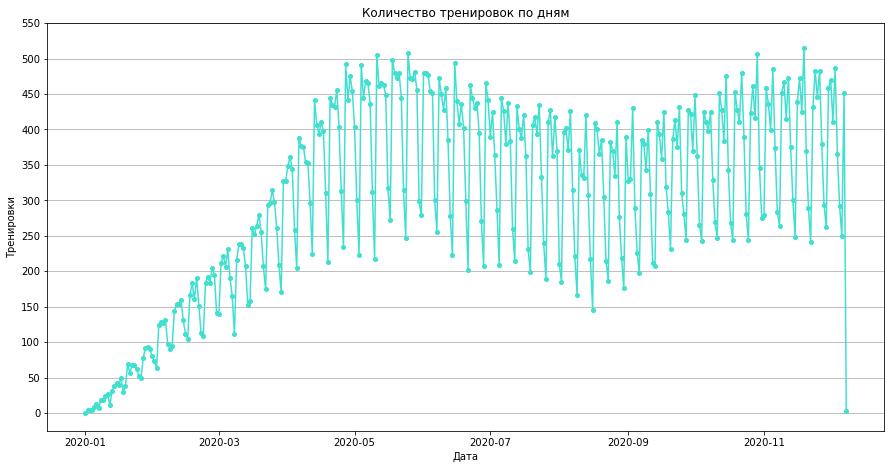

In [11]:
plt.figure(figsize=(15, 7.5))

plt.plot(trainings_by_day ['start_at_day'],
        trainings_by_day ['n_workouts'],
        color = 'turquoise',
        marker = 'o',
        markersize = 4)

plt.title('Количество тренировок по дням')
plt.xlabel('Дата')
plt.ylabel('Тренировки')

plt.yticks(ticks = np.arange(0, 600, 50))

plt.grid(axis = 'y')

plt.show()

удалила значение за последний день

In [12]:
trainings_by_day.tail()

,start_at_day,n_workouts
338,2020-12-04,365
339,2020-12-05,292
340,2020-12-06,250
341,2020-12-07,451
342,2020-12-08,3


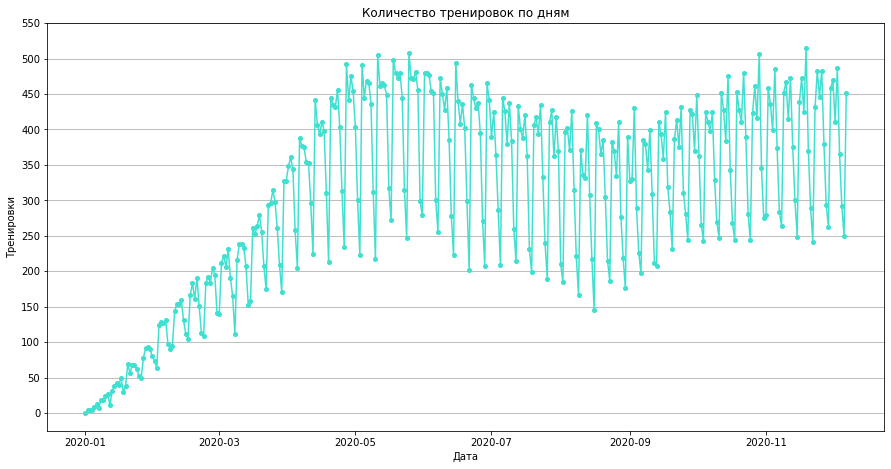

In [13]:
plt.figure(figsize=(15, 7.5))

plt.plot(trainings_by_day.loc[trainings_by_day['start_at_day'] != '2020-12-08']['start_at_day'],
        trainings_by_day.loc[trainings_by_day['start_at_day'] != '2020-12-08']['n_workouts'],
        color = 'turquoise',
        marker = 'o',
        markersize = 4)

plt.title('Количество тренировок по дням')
plt.xlabel('Дата')
plt.ylabel('Тренировки')

plt.yticks(ticks = np.arange(0, 600, 50))

plt.grid(axis = 'y')

plt.show()



#### Построила гистограмму распределения, которая показывает, сколько тренеров провели n число тренировок в ноябре.


In [14]:
# выбрала тренеров, которые вели тренировки до 1 ноября
trainers_select = workouts['trainer_id'].loc[workouts['start_at'] < '2020-11-01'] 

# множеством взяла уникальные значения
trainers_select = set(trainers_select) 

In [15]:
# взяла тренировки только за ноябрь
november_workouts = workouts.loc[workouts['start_at'].dt.month == 11] 

# берем только активных тренеров
november_workouts = november_workouts.loc[november_workouts['trainer_id'].isin(trainers_select)] 

In [16]:
# кол-во тренировок у каждого тренера
workouts_by_trainer = november_workouts.groupby(['trainer_id','trainer_department'])['workout_id'].count() 

# превратила series в dataframe, сбрасываем индекс
workouts_by_trainer = workouts_by_trainer.reset_index() 

# переименовала столбец workout_id, ведь в нем теперь количество тренировок
workouts_by_trainer.columns = ['trainer_id','trainer_department','workouts'] 

workouts_by_trainer.head()

,trainer_id,trainer_department,workouts
0,1994,Spartacus,26
1,4446,Spartacus,9
2,9256,Spartacus,9
3,14431,Spartacus,11
4,15062,Spartacus,8


In [17]:
# какие у нас есть департаменты
departments = set(workouts_by_trainer['trainer_department'])
departments

{'Athletic',
 'Consultant',
 'Cycling',
 'Dinamo',
 'Sales',
 'Spartacus',
 'Sports Reserves'}

#### Построила гистограмму распределения количества тренеров по количеству проведенных тренировок.

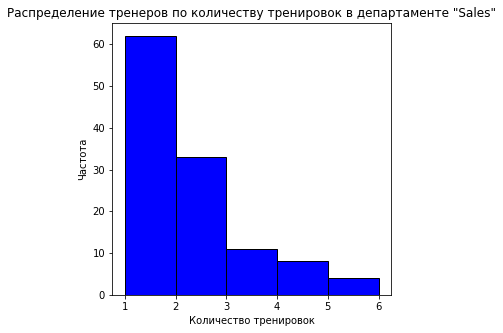

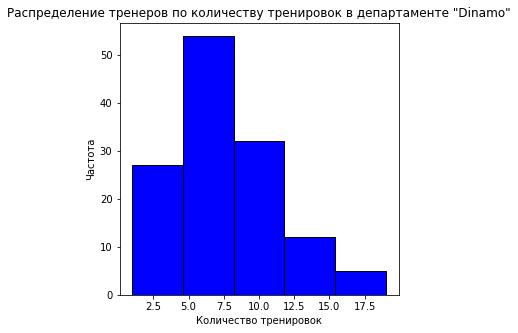

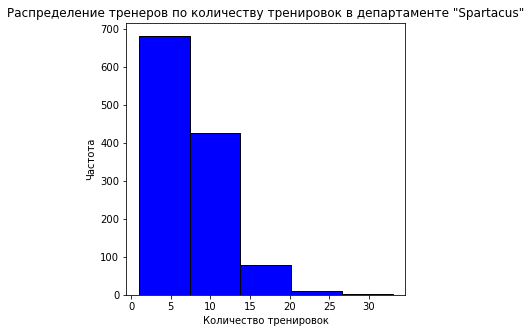

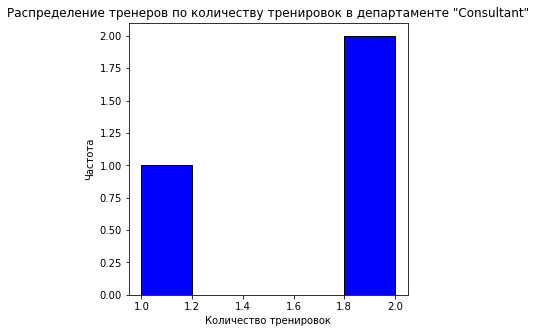

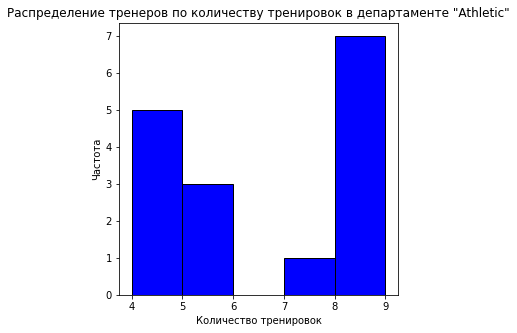

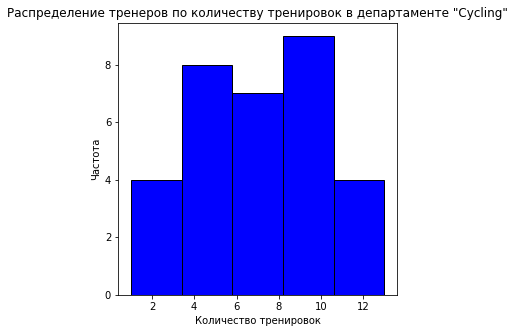

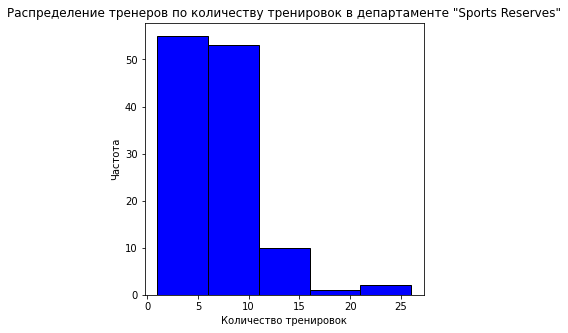

In [18]:
for department in departments:
    
    data = workouts_by_trainer.loc[workouts_by_trainer['trainer_department']==department]
    
    plt.subplots(figsize = (5,5))
    
    plt.hist (data ['workouts'],
              bins = 5,
              edgecolor = 'black',
              color = 'b')
    plt.title (f'Распределение тренеров по количеству тренировок в департаменте "{department}"')
    
    plt.xlabel('Количество тренировок')
    
    plt.ylabel('Частота')
    
    plt.show()

#### Построила boxplot с распределением тренеров по количеству проведенных уроков с разбивкой по департаментам.

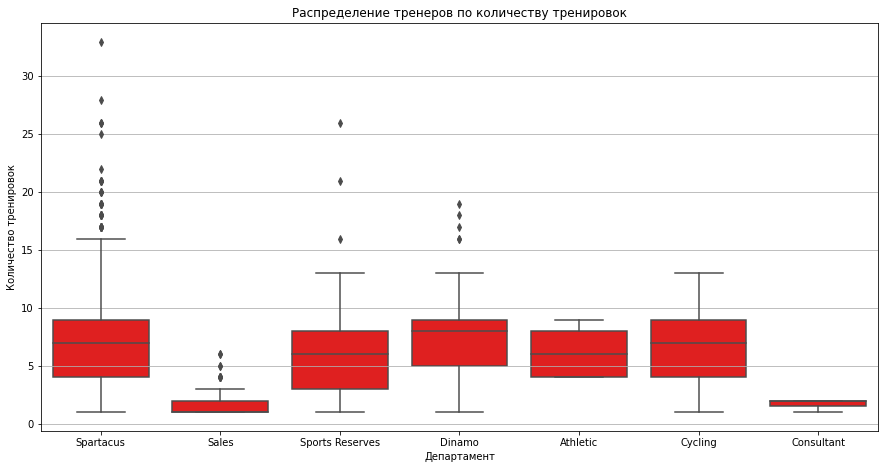

In [19]:
plt.figure(figsize = (15,7.5))

sns.boxplot(x=workouts_by_trainer['trainer_department'], 
            y=workouts_by_trainer['workouts'],
            color='r')

plt.title('Распределение тренеров по количеству тренировок')

plt.xlabel('Департамент')
plt.ylabel('Количество тренировок')

plt.grid(axis = 'y')
plt.show()

### На этой диаграме мы можем увидеть разброс количества тренировок в каждом из департаментов.

## Тренировки


In [20]:
# отфильтровала бесплатные тренировки и сделала копию датафрейма
cost_age_data = workouts_users[['status','cost','age']].loc[workouts_users.workout_schedule_type!='trial'].dropna().copy()

# Изменила тип данных столбцов age и cost на int. Это нужно, чтобы на подписях к диаграммам числа были целыми
cost_age_data['age'] = cost_age_data['age'].apply(int) 
cost_age_data['cost'] = cost_age_data['cost'].apply(int)

# Закодировала столбец status, присваив 1 в случаях, если он равен failed_by_client и 0 в случае success
cost_age_data['status'] = cost_age_data.status.map({'success':0,'failed_by_client':1})

# создала агрегированные наборы данных
cost_age_data_agg = cost_age_data.groupby(['cost','age'])['status'].mean().reset_index() #посчитала долю прогулов по возрасту и цене 

cost_age_data_agg.head()

,cost,age,status
0,500,5,0.000000
1,500,6,0.500000
2,500,7,0.500000
3,500,8,0.242424
4,500,9,0.235294


**Построила скаттерплот, который показвает корреляцию прогулов к цене**

In [21]:
percent_cost = workouts_users[['status','cost']].loc[workouts_users.workout_schedule_type!='trial'].dropna().copy()

percent_cost['cost'] = percent_cost['cost'].apply(int)

percent_cost['failed'] = percent_cost.status.map({'failed_by_client':1})
percent_cost['success'] = percent_cost.status.map({'success': 1})

percent_cost = percent_cost.groupby(['cost'])[['failed', 'success']].sum().reset_index()
percent_cost['percent'] = percent_cost['failed'] / (percent_cost ['success'] + percent_cost['failed']) * 100

percent_cost

,cost,failed,success,percent
0,500,1152.0,3051.0,27.408994
1,750,15663.0,53221.0,22.738227
2,1000,4255.0,19888.0,17.624156
3,1500,381.0,2401.0,13.695183


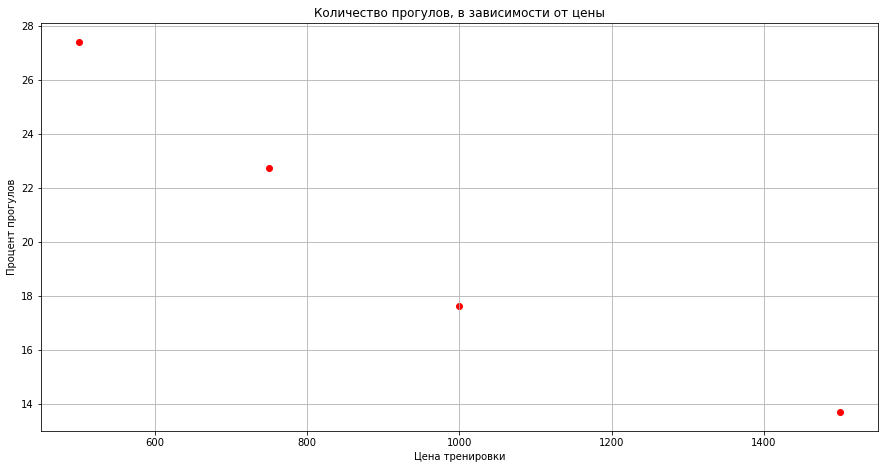

In [22]:
plt.figure(figsize=(15, 7.5))

plt.scatter (percent_cost['cost'], 
             percent_cost['percent'], 
             color = 'r')

plt.title('Количество прогулов, в зависимости от цены')
plt.xlabel('Цена тренировки')
plt.ylabel('Процент прогулов')

plt.grid()
plt.show()

**Построила скаттерплот, который показвает корреляцию прогулов к возрасту**

In [23]:
percent_age = workouts_users[['status','age']].loc[workouts_users.workout_schedule_type!='trial'].dropna().copy()

percent_age['age'] = percent_age['age'].apply(int)

percent_age['failed'] = percent_age.status.map({'failed_by_client':1})
percent_age['success'] = percent_age.status.map({'success': 1})

percent_age = percent_age.groupby(['age'])[['failed', 'success']].sum().reset_index()
percent_age['percent'] = percent_age['failed'] / (percent_age ['success'] + percent_age['failed']) * 100

percent_age.head()

,age,failed,success,percent
0,4,11.0,33.0,25.000000
1,5,4.0,4.0,50.000000
2,6,8.0,29.0,21.621622
3,7,28.0,88.0,24.137931
4,8,80.0,241.0,24.922118


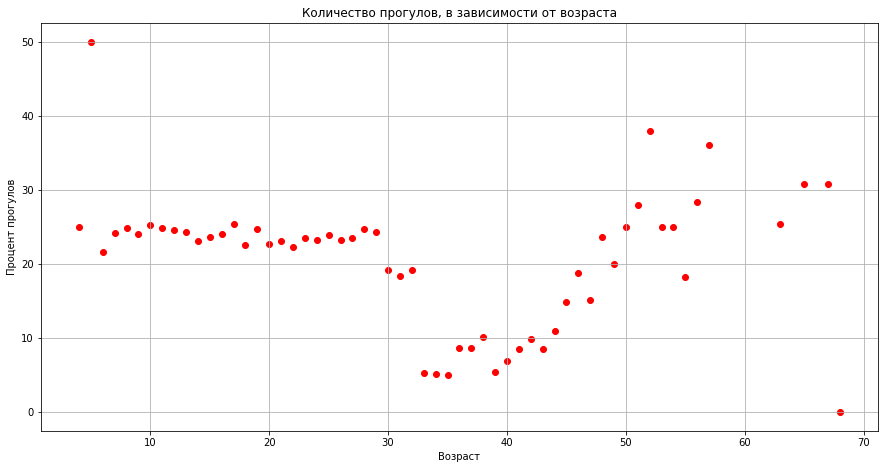

In [24]:
plt.figure(figsize=(15, 7.5))

plt.scatter (percent_age['age'],
             percent_age['percent'],
             color = 'r')

plt.title('Количество прогулов, в зависимости от возраста')
plt.xlabel('Возраст')
plt.ylabel('Процент прогулов')

plt.grid()

plt.show()

 **Построила скаттерплот, который показывает корреляцию прогулов и к возрасту, и к цене одновременно**          

In [25]:
cost_age_data_agg['cost'].unique()

array([ 500,  750, 1000, 1500], dtype=int64)

In [26]:
price_color={500:'r',
            750:'g',
            1000:'b',
            1500:'m'}

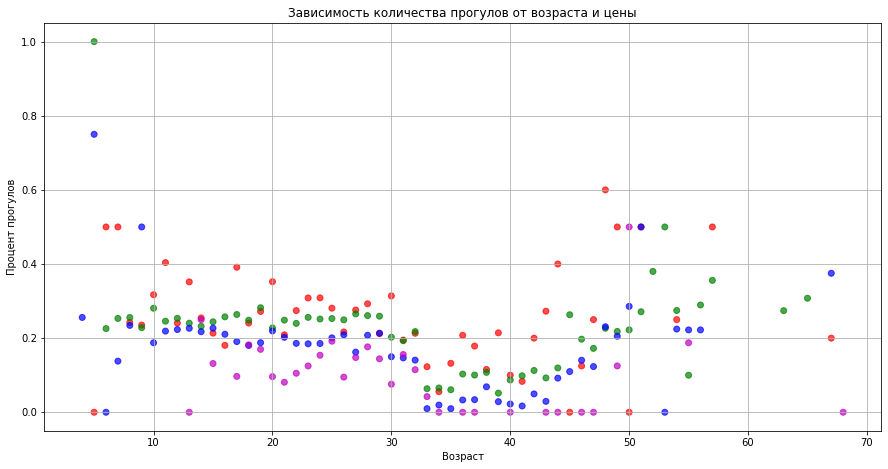

In [27]:
plt.figure(figsize=(15, 7.5))

plt.scatter (cost_age_data_agg['age'], 
             cost_age_data_agg['status'], 
             color = cost_age_data_agg['cost'].map(price_color),
            alpha = 0.7)

plt.title('Зависимость количества прогулов от возраста и цены')
plt.xlabel('Возраст')
plt.ylabel('Процент прогулов')

plt.grid()

plt.show()

#### Создала сводную таблицу (матрицу), в которой строками будут интервалы возраста, столбцами — цена занятия, значением — доля прогулов.


In [28]:
# разбиваем клиентов на возрастные группы

def calculate_age_bins(age):
    if age <= 20:
        return '0-20'
    if age <= 25:
        return '21-25'
    if age <= 30:
        return '26-30'
    if age <= 35:
        return '31-35'
    if age <= 40:
        return '36-40'
    if age <= 45:
        return '41-45'
    if age <= 50:
        return '46-50'
    return '50+'

In [29]:
# кладем в новый столбец возрастную группу
cost_age_data['age_bin'] = cost_age_data.age.apply(calculate_age_bins)

# создаём агрегированный набор данных
cost_age_data_agg = cost_age_data.groupby(['cost','age_bin'])['status'].mean().reset_index()
cost_age_data_agg

,cost,age_bin,status
0,500,0-20,0.286578
1,500,21-25,0.283505
2,500,26-30,0.255597
3,500,31-35,0.165217
4,500,36-40,0.175573
5,500,41-45,0.191489
6,500,46-50,0.285714
7,500,50+,0.307692
8,750,0-20,0.249445
9,750,21-25,0.250124


In [30]:
cost_age_data_agg_pivot = cost_age_data_agg.pivot(index = 'age_bin',
                       columns = 'cost',
                       values = 'status')
for column in [500, 750, 1000, 1500]:
    cost_age_data_agg_pivot[column] = round(cost_age_data_agg_pivot[column],2)
cost_age_data_agg_pivot

cost,500,750,1000,1500
age_bin,,,,
0-20,0.29,0.25,0.21,0.13
21-25,0.28,0.25,0.19,0.16
26-30,0.26,0.25,0.19,0.12
31-35,0.17,0.13,0.07,0.10
36-40,0.18,0.10,0.04,0.00
41-45,0.19,0.11,0.07,0.00
46-50,0.29,0.20,0.17,0.10
50+,0.31,0.30,0.24,0.18


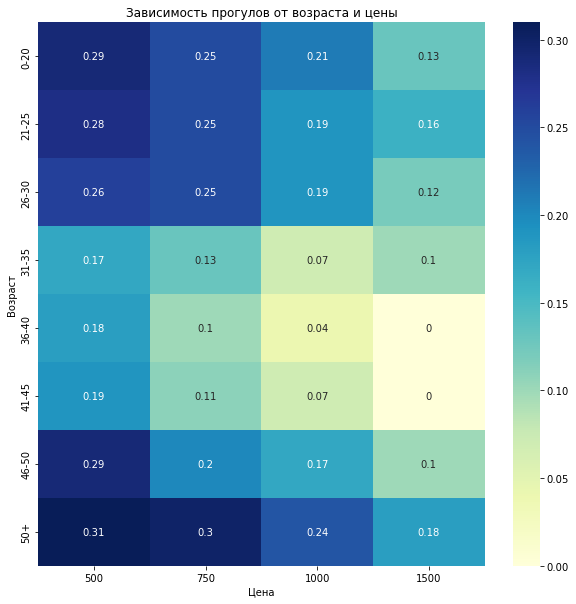

In [37]:
plt.figure(figsize = (10,10))

sns.heatmap(cost_age_data_agg_pivot,
           annot = True,
           cmap = 'YlGnBu',
           fmt = 'g')

plt.title('Зависимость прогулов от возраста и цены')
plt.xlabel('Цена')
plt.ylabel('Возраст')

plt.show()

Самое большое количество прогулов у клиентов возрастом от 46+ лет и тренировками стоимостью 500 рублей (29-31% прогулов).
Также у клиентов до 25 лет (28-29% прогулов)

Нет прогулов у клиентов возрастом от 36 до 45 лет, у которых тренировка стоит 1500 рублей

### Посмотрим на среднее количество тренировок по дням

In [31]:
trainings_by_day 

,start_at_day,n_workouts
0,2020-01-01,1
1,2020-01-02,4
2,2020-01-03,5
3,2020-01-04,5
4,2020-01-05,9
...,...,...
338,2020-12-04,365
339,2020-12-05,292
340,2020-12-06,250
341,2020-12-07,451


In [32]:
trainings_by_day_frame = trainings_by_day.reset_index(drop = True) # сбросим индекс
trainings_by_day_frame.columns=['workouts_date', 'workouts'] # переименуем столбцы, чтобы названия соответствовали содержимому
trainings_by_day_frame['week_day_num'] = trainings_by_day_frame['workouts_date'].dt.weekday # добавим номер дня недели
trainings_by_day_frame['week_day_name'] = trainings_by_day_frame['workouts_date'].dt.day_name() # добавим название дня недели
trainings_by_day_frame

,workouts_date,workouts,week_day_num,week_day_name
0,2020-01-01,1,2,Wednesday
1,2020-01-02,4,3,Thursday
2,2020-01-03,5,4,Friday
3,2020-01-04,5,5,Saturday
4,2020-01-05,9,6,Sunday
...,...,...,...,...
338,2020-12-04,365,4,Friday
339,2020-12-05,292,5,Saturday
340,2020-12-06,250,6,Sunday
341,2020-12-07,451,0,Monday


Мы видим, что нумерация начинается с 0 до 6. Чтобы дни недели выглядели привычнее, добавим к номеру дня 1.

In [33]:
trainings_by_day_frame['week_day_num'] += 1 
trainings_by_day_frame.head()

,workouts_date,workouts,week_day_num,week_day_name
0,2020-01-01,1,3,Wednesday
1,2020-01-02,4,4,Thursday
2,2020-01-03,5,5,Friday
3,2020-01-04,5,6,Saturday
4,2020-01-05,9,7,Sunday


In [34]:
trainings_by_weekday = trainings_by_day_frame.groupby('week_day_num')['workouts'].mean().reset_index()
trainings_by_weekday

,week_day_num,workouts
0,1,366.387755
1,2,349.673469
2,3,332.857143
3,4,365.244898
4,5,304.326531
5,6,227.959184
6,7,190.142857


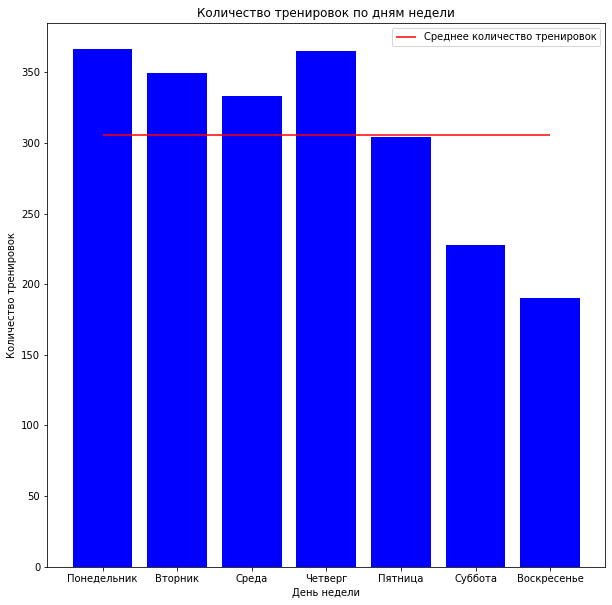

In [35]:
plt.figure(figsize = (10, 10))
plt.bar(trainings_by_weekday['week_day_num'],
        trainings_by_weekday['workouts'],
        color = 'b')
plt.hlines(trainings_by_weekday['workouts'].mean(),
          1, 7,
          label = 'Среднее количество тренировок',
          color = 'r')
plt.title('Количество тренировок по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество тренировок')
plt.xticks(ticks = np.arange(1, 8, 1),
          labels = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье'])
plt.legend()

plt.show()


### На графике видно, что больше всего тренировок приходится на Понедельник и четверг, а меньше всего на субботу и воскресенье. 